In [1]:
import numpy as np
import scipy as sp
from scipy.io import wavfile
from matplotlib import pyplot as plt
import IPython.display as ipd

In [2]:
ipd.Audio("chirp.wav")

In [3]:
def read(filename):
    rate, data = wavfile.read(filename)
    length = data.shape[0] / rate
    time = np.linspace(0, length, data.shape[0], endpoint=False)
    return time, data

def print_info(time, data):
    print(f"time: {time}")
    print(f"data: {data}")
    print(f"rate: {1/(time[1]-time[0])} Hz")
    print(f"duration: {time[-1]+time[1]} s")
    print(f"shape: {data.shape}")
    print(f"dtype: {data.dtype}")

In [4]:
time, data = read("chirp.wav")
print_info(time, data)

time: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 4.99993197e+00
 4.99995465e+00 4.99997732e+00]
data: [    0  1026  2050 ... -9612 -6961 -4065]
rate: 44100.0 Hz
duration: 5.0 s
shape: (220500,)
dtype: int16


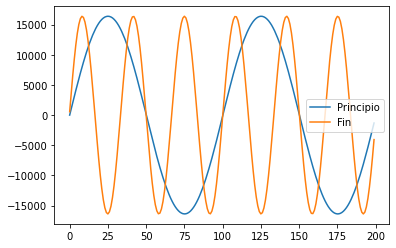

In [5]:
plt.plot(data[0:200], label="Principio")
plt.plot(data[-200:], label="Fin")
plt.legend()

In [6]:
def fft(t, signal):
    a = np.fft.fftfreq(len(t)) / (t[1] - t[0])
    b = np.fft.fft(signal)
    return np.fft.fftshift(a), np.fft.fftshift(b)

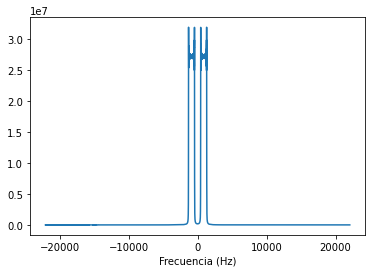

In [7]:
freqs, tdata = fft(time, data)
plt.plot(freqs, np.abs(tdata))
plt.xlabel("Frecuencia (Hz)");

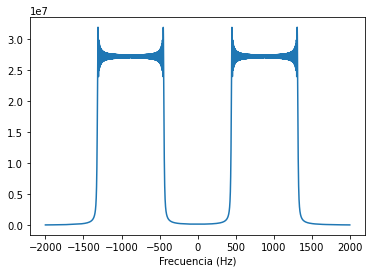

In [8]:
sel = np.abs(freqs) < 2000
plt.plot(freqs[sel], np.abs(tdata[sel]))
plt.xlabel("Frecuencia (Hz)");

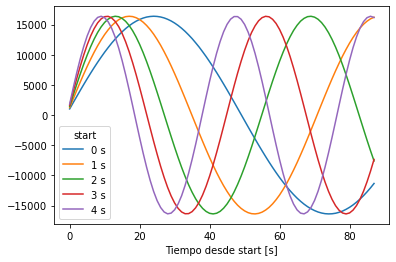

In [9]:
for start in range(5):
    tsel = np.logical_and(start < time, time < (start + .002))
    plt.plot(data[tsel], label=f"{start} s")

plt.legend(title="start")
plt.xlabel("Tiempo desde start [s]");

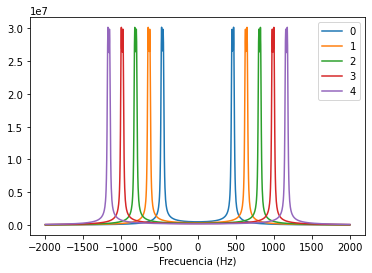

In [10]:
for start in range(5):
    tsel = np.logical_and(start < time, time < (start + .25))
    freqs, tdata = fft(time[tsel], data[tsel])
    fsel = np.abs(freqs) < 2000
    plt.plot(freqs[fsel], np.abs(tdata[fsel]), label=f"{start}")
    
plt.legend()
plt.xlabel("Frecuencia (Hz)");

Para hacer
----------

1. ¿Cómo cambia el espectro de un tono en función del tamaño de la ventana? ¿Por qué?
2. Encontrar y graficar la frecuencia dominante en función del tiempo.
3. Buscar que es un espectrograma y como hacerlo con Python.
4. Utilizando Python, generar una señal con chirp.